In [1]:
from scipy.stats import norm
import matplotlib.pyplot as plt
import numpy as np
from __future__ import print_function

In [2]:
def max_of_n_pdf(n, sd=0.1):
    assert isinstance(sd, list) or isinstance(sd, float)
    if not isinstance(sd, list):
        sd = [sd for ix in range(n)]
    def p(x):
        s = 0
        for i in range(n):
            term = norm.pdf(x, loc=0, scale=sd[i])
            for j in range(n):
                if j != i:
                    term *= norm.cdf(x, loc=0, scale=sd[j])
            s += term
        return s
    
    return p

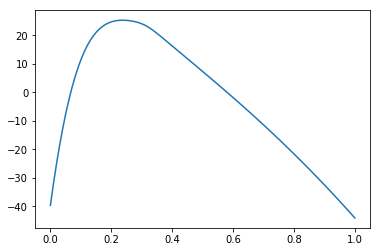

In [3]:
f = max_of_n_pdf(100)
x = np.linspace(start=0., stop=1., num=100)
p = np.log(f(x)/(1e-10 + x**20))

plt.plot(x, p)

In [4]:
def log_likelihood(x, sd):
    n = len(sd)
    f = max_of_n_pdf(n, sd)
    lp = np.sum(np.log(f(x)))
    return lp

In [5]:
X = np.random.normal(loc=0.23, scale=0.1, size=5000)
sd1 = np.linspace(0.21, 0.27, num=30)
sd2 = np.linspace(0.21, 0.27, num=30)
lp = np.zeros([len(sd1), len(sd2)])
for ix, s1 in enumerate(sd1):
    for jx, s2 in enumerate(sd2):
        lp[ix, jx] = log_likelihood(X, [s1, s2])
        

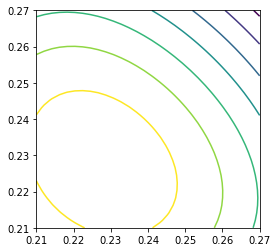

In [6]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

fig = plt.figure(figsize=(4,4))
#ax = fig.gca(projection='3d')
#surf = ax.plot_surface(sd1, sd2, lp,cmap=cm.coolwarm, linewidth=0, antialiased=False)
ax = fig.gca()
ax.contour(sd1, sd2, lp)
plt.show()